<a href="https://colab.research.google.com/github/abdelazizgamal/SDXL_lora_Generate/blob/main/Copy_of_GeneratingDreamboothSDXL_Lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Feb 13 00:48:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0              31W /  70W |  13293MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Install dependencies.
!pip install bitsandbytes transformers accelerate -q
!pip install git+https://github.com/huggingface/diffusers.git -q
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.13.1+cu117.html
# from huggingface_hub import notebook_logi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 27.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# notebook_login()
!pip install -U PEFT transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
!pip show PEFT
!pip show transformers
# !pip install -U PEFT transformers

Name: peft
Version: 0.8.2
Summary: Parameter-Efficient Fine-Tuning (PEFT)
Home-page: https://github.com/huggingface/peft
Author: The HuggingFace team
Author-email: sourab@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: accelerate, huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch, tqdm, transformers
Required-by: 
Name: transformers
Version: 4.37.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft


In [ ]:
# Mount Google drive
from google.colab import drive


drive.mount("/content/drive")
!pwd

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Set the details for your model here:
hf_username = "Abdelaziz67"

# hf_modelname = "horror-lora-model-0"
# checkpoint = "sdxl-horror-lora2.safetensors"

hf_modelname = "romance-lora-models"
checkpoint = "sdxl-romance-lora1.safetensors"


import torch

from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
base = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
base.load_lora_weights(f"{hf_username}/{hf_modelname}", weight_name=checkpoint)



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

sdxl-romance-lora1.safetensors:   0%|          | 0.00/456M [00:00<?, ?B/s]

In [ ]:
_ = base.to("cuda")

In [ ]:
import os
import zipfile
import random


**Horror** generate

In [ ]:

# prompt = f"generate an image of a man and a woman for movie thumbnail for action movie"
# prompt = f"horror movie thumbnail titled Eternal Shadows"

# prompt = """Dive into the macabre depths of Phantom Enigma, a spine-chilling horror masterpiece that materializes the darkest corners of the unknown. Our image generation model, fueled by cutting-edge technology, has meticulously crafted a thumbnail that encapsulates the bone-chilling essence of this cinematic experience.
# The thumbnail invites viewers into a world cloaked in shadow, where mystery and terror intertwine. A haunting palette of deep, foreboding hues dominates the frame, shrouding the scene in an unsettling darkness that beckons curious souls to explore further. Wisps of spectral mist dance around the edges, hinting at the ethereal forces that linger just beyond the viewer's perception.
# At the heart of the image, an enigmatic figure emerges—a silhouette that teeters on the edge of the tangible and the supernatural. Illuminated by an otherworldly glow, the figure casts long, ominous shadows that stretch across the eerie landscape. The air is thick with anticipation as the image captures the very essence of fear, leaving spectators on the precipice of dread.
# A subtle play of light and shadow creates an atmosphere of suspense, while spectral elements—subtle enough to evoke a shiver—add layers of complexity to the composition. The composition is designed to instill a sense of unease and fascination, enticing audiences to unravel the mysteries within "Phantom Enigma."
# In this carefully crafted thumbnail, the image generation model conjures a visual symphony of horror, inviting audiences to experience a cinematic journey that transcends the boundaries of the known. Brace yourself for the unknown, as "Phantom Enigma" redefines the horror genre with a thumbnail that encapsulates the very essence of fear itself"
# """

# prompt = """compelling and chilling horror movie thumbnail for an upcoming
# film titled 'Eternal'. The movie is a psychological thriller set in a haunted mansion with supernatural elements. The main characters include a tormented spirit and a group of
# unsuspecting individuals trapped in the eerie confines of the mansion"""

# prompt ="Craft a horrifying horror movie thumbnail with a haunted carnival theme. The main image should feature a sinister carnival tent surrounded by an unsettling fog. In the foreground, depict a nightmarish clown figure with a malevolent grin, holding a blood-stained balloon. Illuminate the scene with flickering carnival lights casting eerie shadows. Add subtle details like abandoned carnival rides, distorted reflections, or ghostly apparitions to enhance the sense of supernatural horror. The goal is to create a chilling and atmospheric image that captures the essence of the film's terrifying narrative and compels potential viewers to experience the frightful journey within."

# prompt = """Title: “The Haunting Shadows”
# Dark, eerie, and suspenseful
# A sinister silhouette of a cloaked figure with glowing eyes, partially obscured by mist or fog.
# A creepy mansion with broken windows, overgrown vines, and a full moon peeking through the clouds.
# Moonlight casting elongated shadows, emphasizing the figure’s malevolence.
# The cloaked figure holds an ancient grimoire with cryptic symbols.
# Flickering candles on the mansion’s windowsills, illuminating the darkness.
# A few ominous ravens perched on the roof, watching silently.
# Wisps of ghostly mist swirling around the figure’s feet.
# Deep midnight blue, charcoal black, and blood red.
# Glowing green from the figure’s eyes and the moon’s reflection.
# Choose a gothic or distressed font for the movie title.
# Overlay the title across the top or bottom, slightly skewed.
# Add a chilling tagline: Beware what lurks in the shadows…"""
# prompt = "bone-chilling horror movie thumbnail set in an abandoned psychiatric hospital. The focal point should be a dimly lit hallway with peeling wallpaper and flickering lights. Feature a ghostly figure in tattered hospital attire, with hollow eyes staring directly at the viewer. Incorporate subtle details like creaking doors, wheelchair shadows, and haunting whispers to intensify the sense of eerie isolation. The overall composition should evoke a feeling of psychological terror, enticing viewers to delve into the disturbing and mysterious narrative of the film"

# prompt = "Craft a mysterious horror movie thumbnail set in a moonlit forest. Highlight an enigmatic creature's silhouette amid shadows and twisted trees. Use subtle lighting to evoke curiosity and fear, inviting viewers into the film's supernatural mysteries."
# prompt = "Craft a chilling horror movie thumbnail set in a moonlit graveyard. Feature a solitary tombstone, bathed in dim candlelight, with a ghostly figure in the background. Enhance the eerie atmosphere with skeletal trees and spectral fog, creating a captivating glimpse into the dark mysteries of the film."
# prompt = "Design a haunting horror movie thumbnail reminiscent of 'Dead Silence.' Feature a vintage, eerie puppet on a dimly lit stage, surrounded by an atmosphere of suspenseful darkness. Incorporate subtle details like ghostly whispers, old theatrical curtains, and a sense of foreboding stillness. Capture the essence of the unsettling puppetry from the movie to create a chilling and atmospheric image that entices viewers into the mysterious and eerie world of the film"

prompt = "Create a tense horror movie thumbnail reminiscent of 'A Quiet Place.' Showcase survivors in a post-apocalyptic setting, conveying silent dread and hidden threats. Capture the suspense with muted tones and subtle details, inviting viewers into the eerie and quiet world of the film"
quality = "ultra realistic, absolute detail of even the smallest particles, beautiful shadows, masterpiece, intricate detail of the environment, HDR, 8k"
negative_prompt = "cartoon, low quality,  boring, tired, crosseyed, dumb, stupid, cockeyed, disfigured, blurry, assymetrical, unrealistic, grayscale, black and white, grayscale, bad anatomy, unnatural irises, no pupils, blurry eyes, dark eyes, extra limbs, deformed, disfigured eyes, out of frame, no irises, assymetrical face, broken fingers, extra fingers, disfigured hands"

num_samples = 1
guidance_scale = 8
num_inference_steps = 30
height = 1024
width = 1024
seed = random.randint(1, 999999)

images = base(
    prompt + ". " + quality,
    height=height,
    width=width,
    num_images_per_prompt=num_samples,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=torch.manual_seed(seed)
).images

for image in images:
    display(image)

**Romance** Generate

Token indices sequence length is longer than the specified maximum sequence length for this model (88 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of the environment, natural lighting, hdr, 8 k']
Token indices sequence length is longer than the specified maximum sequence length for this model (88 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of the environment, natural lighting, hdr, 8 k']


  0%|          | 0/30 [00:00<?, ?it/s]

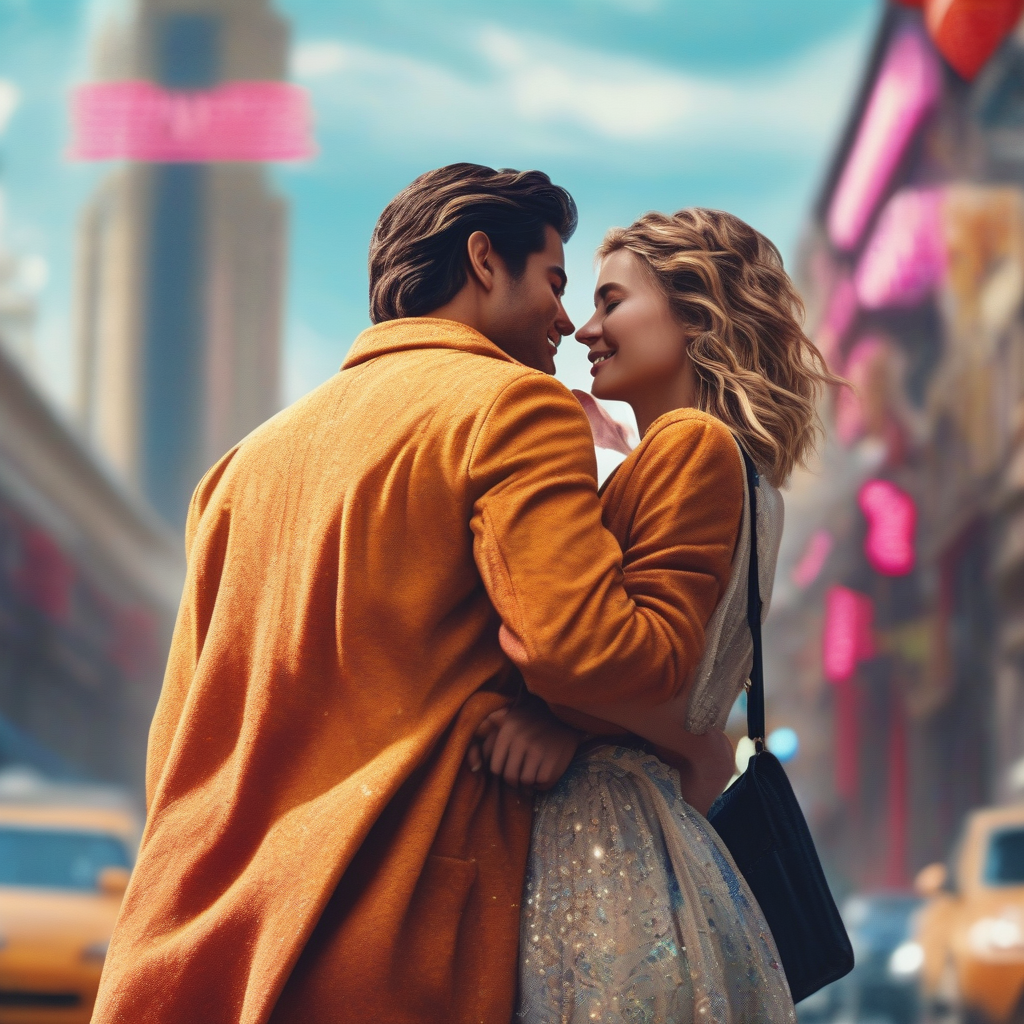

In [ ]:
# prompt = f"generate an image of a man and a woman for movie thumbnail for action movie"
# prompt = f" romantic action movie thumbnail Feature a dynamic scene with a couple in an intense, action-packed moment, surrounded by elements like dramatic lighting, explosions, or cityscape backgrounds. Infuse the image with a romantic undertone, balancing both the passion and adrenaline of the genre. Ensure the thumbnail is visually striking to captivate potential viewers."
prompt = f"Create a romantic movie thumbnail with an AI. Show a close-up of a loving couple in a warm, sunset-lit scene. Use soft colors, subtle romantic symbols, and convey a strong emotional connection. Make it visually engaging to attract viewers"
prompt = f"Generate a romantic action movie thumbnail with AI. Illustrate a thrilling scene featuring a couple in a dynamic and intense moment. Use impactful visuals to convey both romance and action, creating an enticing thumbnail for potential viewers"
quality = "ultra realistic, absolute detail of even the smallest particles, smile, kindness, interesting outfit, beautiful hands, full head of hair, beautiful shadows, masterpiece, intricate detail of the environment, natural lighting, HDR, 8k"
negative_prompt = "cartoon, low quality, ugly, old, boring, tired, wrinkles, scar, big forehead, crosseyed, dumb, stupid, cockeyed, disfigured, blurry, assymetrical, unrealistic, grayscale, black and white, grayscale, bad anatomy, unnatural irises, no pupils, blurry eyes, dark eyes, extra limbs, deformed, disfigured eyes, out of frame, no irises, assymetrical face, broken fingers, extra fingers, disfigured hands"

num_samples = 1
guidance_scale = 8
num_inference_steps = 30
height = 1024
width = 1024
seed = random.randint(1, 999999)

images = base(
    prompt + ". " + quality,
    height=height,
    width=width,
    num_images_per_prompt=num_samples,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=torch.manual_seed(seed)
).images

for image in images:
    display(image)

In [ ]:
image.save(f"{seed}.png")